# Python California Housing Dataset Linear Regression Example

In this notebook, the example code uses the simple and multiple linear regression models developed from scratch using Python programming with the NumPy library. Additional code I would use has been provided in the examples to explain the methods behind machine learning hold-out cross-validation. The multiple linear regression example is similar to the simple linear regression example, which makes it easier for anyone to follow along and build their skills on from simple linear regression. The notebook is for educational purposes and has been designed as an introduction to machine learning with Python.

# Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn

print('ScikitLearn Version: ', sklearn.__version__)

ScikitLearn Version:  1.6.1


# Mount Google Drive to the Notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the California Housing Dataset

ScikitLearn California Housing Dataset Link:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [3]:
X = pd.read_csv('/content/drive/MyDrive/Linear_Regression/X.csv')
y = pd.read_csv('/content/drive/MyDrive/Linear_Regression/y.csv')

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
y

,MedHouseValue
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


# Convert the Dataset from Pandas DataFrames to NumPy Arrays

In [5]:
X = X.values
print('X shape: ', X.shape)
y = y.values.ravel()
print('y shape: ', y.shape)

X shape:  (20640, 8)
y shape:  (20640,)


# Simple Linear Regression

# Normalise the Dataset

In [6]:
standard_x = StandardScaler()
standard_y = StandardScaler()
X = standard_x.fit_transform(X)
y = standard_y.fit_transform(y[:, np.newaxis]).flatten()

# Reduce the Features (X) Down to One Single Feature (Median Income)

In [7]:
X = X[:, [0]]  # Use only one feature
X

array([[ 2.34476576],
       [ 2.33223796],
       [ 1.7826994 ],
       ...,
       [-1.14259331],
       [-1.05458292],
       [-0.78012947]])

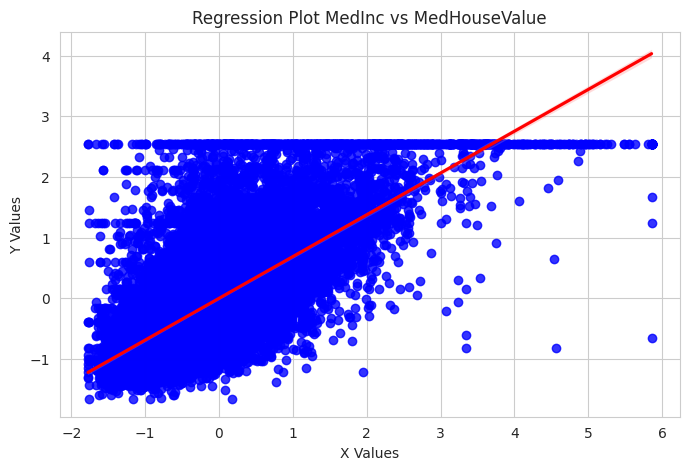

In [8]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X, y=y, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Regression Plot MedInc vs MedHouseValue")

# Show the plot
plt.show()

# Split the Training and Test Data

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('y test shape: ', y_test.shape)

X train shape:  (16512, 1)
y train shape:  (16512,)
X test shape:  (4128, 1)
y test shape:  (4128,)


In [10]:
X_train

array([[-0.32165429],
       [-0.03061993],
       [ 0.1503488 ],
       ...,
       [-0.49283239],
       [ 0.97302487],
       [-0.68174943]])

In [11]:
y_train

array([-0.90001975,  1.51867493, -0.29686264, ...,  0.13210686,
        0.66420236,  1.02384345])

In [12]:
X_test

array([[-1.15248922],
       [-0.70501534],
       [-0.20558796],
       ...,
       [ 2.82092723],
       [-0.57147326],
       [-0.16768875]])

In [13]:
y_test

array([-1.37925233, -1.39571783,  2.54041094, ...,  2.54041094,
       -1.16606749, -0.4797163 ])

# Linear Regression Model Python Object

In [14]:
# LinearRegression Python object
class LinearRegression(object):

    # Class constructor
    def __init__(self, learning_rate=0.001, iterations=1000):

        """Linear Regression Python object.
           ARGS:
               learning_rate (float): Learning rate.
               iterations (int): Maximum number of iterations.
        """
        self.lr = learning_rate
        self.iterations = iterations

    # Fit method to train and validate teh Linear Regression model
    def fit(self, X_train, y_train):

        """Python class method to train and validate teh Linear Regression model.
           ARGS:
               X_train (numpy array): training dataset features.
               y_train (numpy array): training dataset targets.
               X_val (numpy array): validation dataset features.
               y_val (numpy array): validation dataset targets.
        """

        self.w_ = np.zeros(1 + X_train.shape[1]) # Weights and bias NumPy array of zeros
        self.cost_ = []                          # Stores the training cost MSE values
        self.low_cost = None                     # Stores the lowest cost interation value

        # Controls the maximum number of iterations set for training and validation
        for i in range(self.iterations):

            # Training iteration
            output = self.net_input(X_train)                 # LR model output
            errors = (y_train - output)                      # LR model error calculation
            self.w_[1:] += self.lr * X_train.T.dot(errors)   # Weights Gradient Descent
            self.w_[0] += self.lr * errors.sum()             # Bias Gradient Descent
            cost = (errors**2).sum() / len(errors)     # MSE cost calculation
            self.cost_.append(cost)                    # MSE cost caculation list storage
            print('Training Iteration: \t', i+1, '\tTraining Cost: \t\t', cost)

        # Calculates the index of the minimum cost and how many epoch to train the model
        # for after training and validation
        self.low_cost = (self.cost_.index(min(self.cost_)) + 1)
        print(f"\nSet Number of Iterations to {self.low_cost}")
        print('Minimum Cost: ', min(self.cost_))
        return self

    # Python class method to calculate the dot product between the weights and the bias
    def net_input(self, X):
        """Python class method to calculate the dot product between the weights and the bias.
           ARGS:
                  X (numpy array): dataset features.
           RETURNS:
                  dot product between the features (X) and the weights (W) plus the bias (b)
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    # Python class method to make model predictions without calculating the cost
    def predict(self, X):
        """Python class method to make model predictions without calculating the cost.
           ARGS:
                   X (numpy array): dataset features.
           RETURNS:
                   Model predictions.
        """
        return self.net_input(X)

# Train the Simple Linear Regression Model

In [15]:
# Hyperparameters
learning_rate = 0.00001
iterations = 1000
# --------------

linear_regression = LinearRegression(learning_rate=learning_rate, iterations=iterations)

linear_regression.fit(X_train, y_train)

Training Iteration: 	 1 	Training Cost: 		 1.0039348085144204
Training Iteration: 	 2 	Training Cost: 		 0.8582217186193714
Training Iteration: 	 3 	Training Cost: 		 0.7568476165433549
Training Iteration: 	 4 	Training Cost: 		 0.68632029687466
Training Iteration: 	 5 	Training Cost: 		 0.6372532808624664
Training Iteration: 	 6 	Training Cost: 		 0.6031164006121261
Training Iteration: 	 7 	Training Cost: 		 0.5793666022560612
Training Iteration: 	 8 	Training Cost: 		 0.56284325824131
Training Iteration: 	 9 	Training Cost: 		 0.5513474929818467
Training Iteration: 	 10 	Training Cost: 		 0.5433495232442045
Training Iteration: 	 11 	Training Cost: 		 0.5377850564261036
Training Iteration: 	 12 	Training Cost: 		 0.5339136453173104
Training Iteration: 	 13 	Training Cost: 		 0.5312201454105866
Training Iteration: 	 14 	Training Cost: 		 0.5293461583869666
Training Iteration: 	 15 	Training Cost: 		 0.5280423368854308
Training Iteration: 	 16 	Training Cost: 		 0.5271352024637321
Train

In [16]:
# Index 0 = bias, index 1 = weights
print(f'Trained Bias and Weight {linear_regression.w_}')
print(f'Minimum Cost: {min(linear_regression.cost_)}')
print(f'Set Number of Iterations to: {linear_regression.low_cost}')

Trained Bias and Weight [-0.00072754  0.69038011]
Minimum Cost: 0.5250606882633935
Set Number of Iterations to: 176


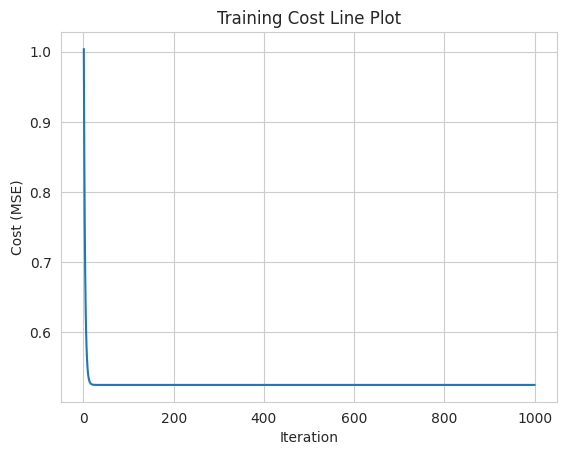

In [17]:
plt.title('Training Cost Line Plot')
plt.plot(range(1, linear_regression.iterations+1), linear_regression.cost_)
plt.ylabel('Cost (MSE)')
plt.xlabel('Iteration')
plt.show()

In [18]:
linear_regression = LinearRegression(learning_rate=learning_rate,
                                     iterations=linear_regression.low_cost)

linear_regression.fit(X_train, y_train)

Training Iteration: 	 1 	Training Cost: 		 1.0039348085144204
Training Iteration: 	 2 	Training Cost: 		 0.8582217186193714
Training Iteration: 	 3 	Training Cost: 		 0.7568476165433549
Training Iteration: 	 4 	Training Cost: 		 0.68632029687466
Training Iteration: 	 5 	Training Cost: 		 0.6372532808624664
Training Iteration: 	 6 	Training Cost: 		 0.6031164006121261
Training Iteration: 	 7 	Training Cost: 		 0.5793666022560612
Training Iteration: 	 8 	Training Cost: 		 0.56284325824131
Training Iteration: 	 9 	Training Cost: 		 0.5513474929818467
Training Iteration: 	 10 	Training Cost: 		 0.5433495232442045
Training Iteration: 	 11 	Training Cost: 		 0.5377850564261036
Training Iteration: 	 12 	Training Cost: 		 0.5339136453173104
Training Iteration: 	 13 	Training Cost: 		 0.5312201454105866
Training Iteration: 	 14 	Training Cost: 		 0.5293461583869666
Training Iteration: 	 15 	Training Cost: 		 0.5280423368854308
Training Iteration: 	 16 	Training Cost: 		 0.5271352024637321
Train

In [19]:
print(f'Minimum Cost: {min(linear_regression.cost_)}')
print(f'Set Number of Iterations to: {linear_regression.low_cost}')

Minimum Cost: 0.5250606882633935
Set Number of Iterations to: 176


# Test Evaluation Metrics

In [20]:
y_pred = linear_regression.predict(X_test)
y_pred

array([-0.79638317, -0.4874561 , -0.14266138, ...,  1.94678451,
       -0.39526131, -0.11649651])

In [21]:
# Python method to calculate correlation coefficient metrics
def correlation(X, y):
    # Import Scipy libraray
    import scipy.stats

    # Calculate Pearson's Linear Correlation Coefficient with Scipy
    PLCC = scipy.stats.pearsonr(X, y)  # Pearson's r

    # Calculate Spearman Rank Correlation Coefficient (SRCC) with Scipy
    SRCC = scipy.stats.spearmanr(X, y)  # Spearman's rho

    # Calculate Kendalls Rank Correlation Coefficient (KRCC) with Scipy
    KRCC = scipy.stats.kendalltau(X, y)  # Kendall's tau

    # Prints out the correlation performance metric results to the screen
    print("PLCC: ", PLCC)
    print("SRCC: ", SRCC)
    print("KRCC: ", KRCC)

In [22]:
# Calls the correlation coefficient Python method to calculate PLCC, SRCC, and KRCC
# with SciPy
correlation(y_pred, y_test)

PLCC:  PearsonRResult(statistic=0.6775016011370294, pvalue=0.0)
SRCC:  SignificanceResult(statistic=0.6717539981126641, pvalue=0.0)
KRCC:  SignificanceResult(statistic=0.490677943048135, pvalue=0.0)


In [23]:
metrics.r2_score(y_test, y_pred)

0.4588591890384668

In [24]:
metrics.mean_squared_error(y_test, y_pred)

0.5325489973101188

# Plot the Simple Linear Regression Model Predictions

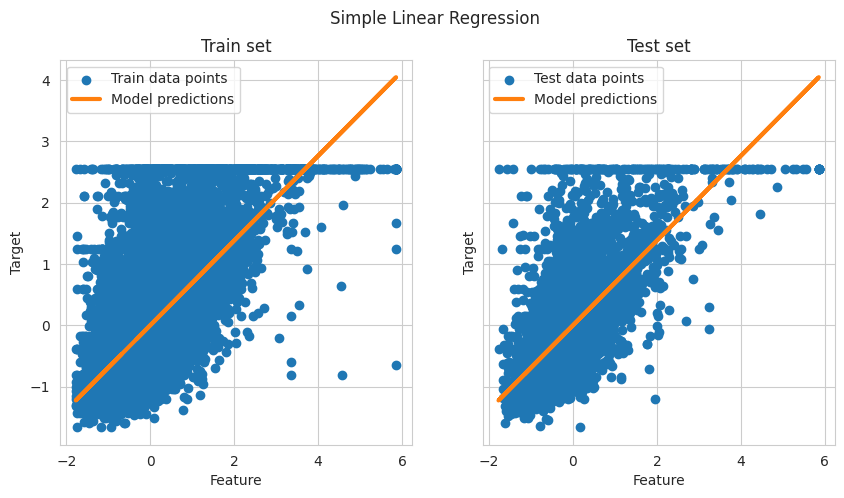

In [25]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5), sharex=True, sharey=True)

ax[0].scatter(X_train, y_train, label="Train data points")
ax[0].plot(
    X_train,
    linear_regression.predict(X_train),
    linewidth=3,
    color="tab:orange",
    label="Model predictions",
)
ax[0].set(xlabel="Feature", ylabel="Target", title="Train set")
ax[0].legend()

ax[1].scatter(X_test, y_test, label="Test data points")
ax[1].plot(X_test, y_pred, linewidth=3, color="tab:orange", label="Model predictions")
ax[1].set(xlabel="Feature", ylabel="Target", title="Test set")
ax[1].legend()

fig.suptitle("Simple Linear Regression")

plt.show()

# Multiple Linear Regression

In [26]:
X = pd.read_csv('/content/drive/MyDrive/Linear_Regression/X.csv')
y = pd.read_csv('/content/drive/MyDrive/Linear_Regression/y.csv')

X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [27]:
y

,MedHouseValue
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


# Convert the Dataset from Pandas DataFrames to NumPy Arrays

In [28]:
X = X.values
print('X shape: ', X.shape)
y = y.values.ravel()
print('y shape: ', y.shape)

X shape:  (20640, 8)
y shape:  (20640,)


# Normalise the Dataset

In [29]:
standard_x = StandardScaler()
standard_y = StandardScaler()
X = standard_x.fit_transform(X)
y = standard_y.fit_transform(y[:, np.newaxis]).flatten()

# Split the Training and Test Data

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X train shape: ', X_train.shape)
print('y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('y test shape: ', y_test.shape)

X train shape:  (16512, 8)
y train shape:  (16512,)
X test shape:  (4128, 8)
y test shape:  (4128,)


In [31]:
X_train

array([[-0.32165429,  0.34647803, -0.16625886, ...,  0.05980847,
        -1.36797628,  1.26764451],
       [-0.03061993,  1.61780729, -0.3861807 , ..., -0.12830597,
        -0.87169852,  0.7036268 ],
       [ 0.1503488 , -1.95780625,  0.08764093, ..., -0.03345346,
        -0.45501247, -0.45435647],
       ...,
       [-0.49283239,  0.58485227, -0.58294927, ...,  0.02517025,
        -0.74997001,  0.59381804],
       [ 0.97302487, -1.08376738,  0.39058403, ...,  0.01042151,
         0.91209231, -1.19306993],
       [-0.68174943,  1.85618152, -0.81905034, ..., -0.09262259,
         1.00104776, -1.42267006]])

In [32]:
y_train

array([-0.90001975,  1.51867493, -0.29686264, ...,  0.13210686,
        0.66420236,  1.02384345])

In [33]:
X_test

array([[-1.15248922, -0.2891866 , -0.49989596, ...,  0.07768129,
         0.20044873,  0.27936569],
       [-0.70501534,  0.10810379, -0.1574771 , ..., -0.03763415,
        -0.23028292,  0.05475686],
       [-0.20558796,  1.85618152, -0.5868143 , ..., -0.164679  ,
         1.01509336, -1.43265267],
       ...,
       [ 2.82092723, -0.2891866 ,  0.73104024, ..., -0.02697551,
         0.78568194, -1.23799169],
       [-0.57147326,  0.58485227, -0.05657389, ..., -0.04641411,
         0.53286119, -0.09498235],
       [-0.16768875, -0.92485123, -0.58209158, ...,  0.06347664,
        -0.66101456,  0.59880935]])

In [34]:
y_test

array([-1.37925233, -1.39571783,  2.54041094, ...,  2.54041094,
       -1.16606749, -0.4797163 ])

# Train the Multiple Linear Regression Model

In [35]:
# Hyperparameters
learning_rate = 0.00001
iterations = 3000
# ---------------

linear_regression = LinearRegression(learning_rate=learning_rate, iterations=iterations)

linear_regression.fit(X_train, y_train)

Training Iteration: 	 1 	Training Cost: 		 1.0039348085144204
Training Iteration: 	 2 	Training Cost: 		 0.8410165042135493
Training Iteration: 	 3 	Training Cost: 		 0.7303344391359784
Training Iteration: 	 4 	Training Cost: 		 0.6541738403297751
Training Iteration: 	 5 	Training Cost: 		 0.6011388577861174
Training Iteration: 	 6 	Training Cost: 		 0.5637714888816319
Training Iteration: 	 7 	Training Cost: 		 0.5371194130347219
Training Iteration: 	 8 	Training Cost: 		 0.5178543362957942
Training Iteration: 	 9 	Training Cost: 		 0.5037172817179049
Training Iteration: 	 10 	Training Cost: 		 0.49316266788991553
Training Iteration: 	 11 	Training Cost: 		 0.4851260094884994
Training Iteration: 	 12 	Training Cost: 		 0.4788701057003484
Training Iteration: 	 13 	Training Cost: 		 0.47388198269562903
Training Iteration: 	 14 	Training Cost: 		 0.4698031748461708
Training Iteration: 	 15 	Training Cost: 		 0.46638219288517696
Training Iteration: 	 16 	Training Cost: 		 0.463441915560259

In [36]:
# Index 0 = bias, index 1 to 8 = weights
print(f'Trained Bias and Weight {linear_regression.w_}')
print(f'Minimum Cost: {min(linear_regression.cost_)}')
print(f'Set Number of Iterations to: {linear_regression.low_cost}')

Trained Bias and Weight [-6.03035421e-04  7.38678269e-01  1.06057065e-01 -2.64414987e-01
  3.21624761e-01 -1.99181608e-03 -3.17382236e-02 -7.77028452e-01
 -7.53016361e-01]
Minimum Cost: 0.38897000398171133
Set Number of Iterations to: 2325


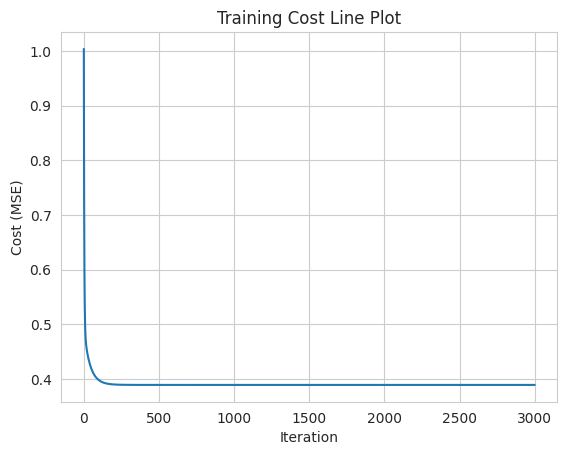

In [37]:
plt.title('Training Cost Line Plot')
plt.plot(range(1, linear_regression.iterations+1), linear_regression.cost_)
plt.ylabel('Cost (MSE)')
plt.xlabel('Iteration')
plt.show()

In [38]:
linear_regression = LinearRegression(learning_rate=learning_rate,
                                     iterations=linear_regression.low_cost)

linear_regression.fit(X_train, y_train)

Training Iteration: 	 1 	Training Cost: 		 1.0039348085144204
Training Iteration: 	 2 	Training Cost: 		 0.8410165042135493
Training Iteration: 	 3 	Training Cost: 		 0.7303344391359784
Training Iteration: 	 4 	Training Cost: 		 0.6541738403297751
Training Iteration: 	 5 	Training Cost: 		 0.6011388577861174
Training Iteration: 	 6 	Training Cost: 		 0.5637714888816319
Training Iteration: 	 7 	Training Cost: 		 0.5371194130347219
Training Iteration: 	 8 	Training Cost: 		 0.5178543362957942
Training Iteration: 	 9 	Training Cost: 		 0.5037172817179049
Training Iteration: 	 10 	Training Cost: 		 0.49316266788991553
Training Iteration: 	 11 	Training Cost: 		 0.4851260094884994
Training Iteration: 	 12 	Training Cost: 		 0.4788701057003484
Training Iteration: 	 13 	Training Cost: 		 0.47388198269562903
Training Iteration: 	 14 	Training Cost: 		 0.4698031748461708
Training Iteration: 	 15 	Training Cost: 		 0.46638219288517696
Training Iteration: 	 16 	Training Cost: 		 0.463441915560259

In [39]:
print(f'Minimum Cost: {min(linear_regression.cost_)}')
print(f'Set Number of Iterations to: {linear_regression.low_cost}')

Minimum Cost: 0.38897000398171133
Set Number of Iterations to: 2325


# Test Evaluation Metrics

In [40]:
y_pred = linear_regression.predict(X_test)
y_pred

array([-1.16942746, -0.26391729,  0.55558107, ...,  2.08003582,
       -0.76351976, -0.05126459])

In [41]:
# Calls the correlation coefficient Python method to calculate PLCC, SRCC, and KRCC
# with SciPy
correlation(y_pred, y_test)

PLCC:  PearsonRResult(statistic=0.7598883415163209, pvalue=0.0)
SRCC:  SignificanceResult(statistic=0.8063121723313034, pvalue=0.0)
KRCC:  SignificanceResult(statistic=0.6176744108347061, pvalue=0.0)


In [42]:
metrics.r2_score(y_test, y_pred)

0.5757877058012556

In [43]:
metrics.mean_squared_error(y_test, y_pred)

0.4174769807524745

# Plot the Model Predictions

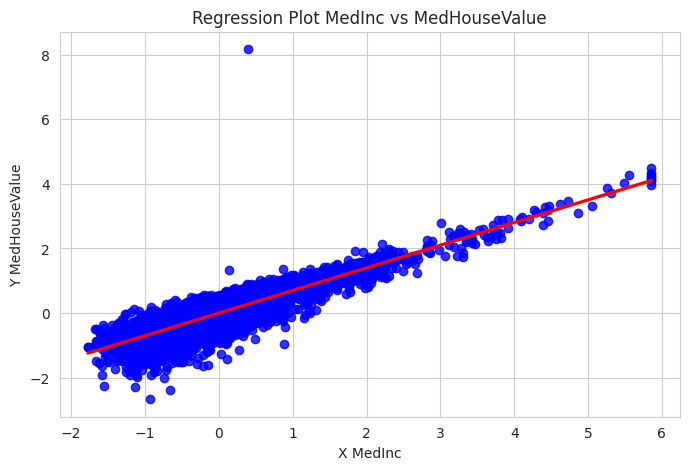

In [44]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [0]], y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X MedInc")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot MedInc vs MedHouseValue")

# Show the plot
plt.show()

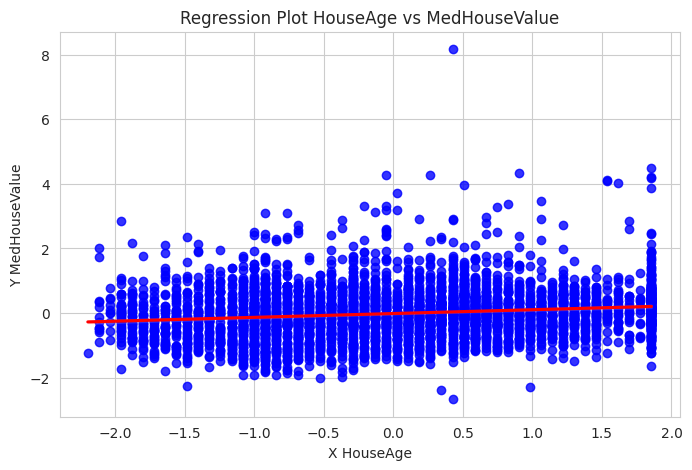

In [45]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [1]], y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X HouseAge")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot HouseAge vs MedHouseValue")

# Show the plot
plt.show()

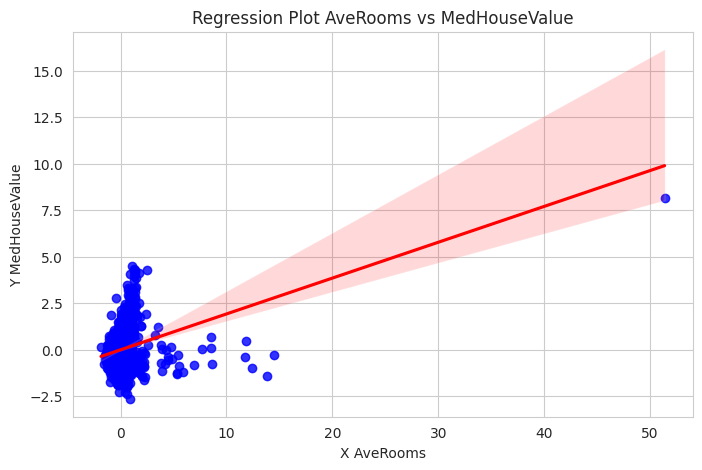

In [46]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [2]], y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X AveRooms")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot AveRooms vs MedHouseValue")

# Show the plot
plt.show()

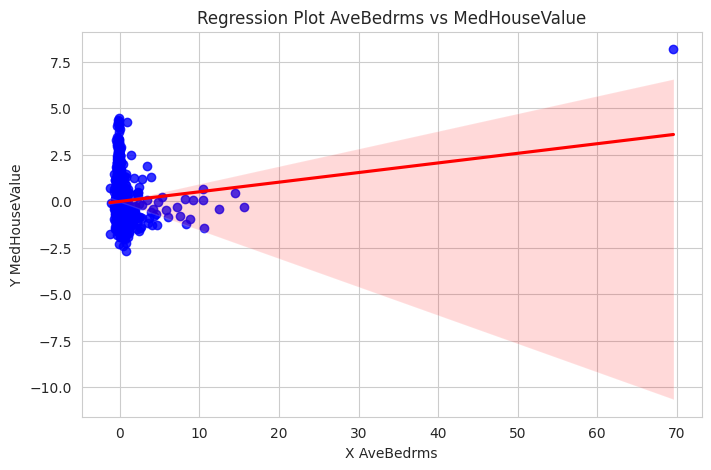

In [47]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [3]], y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X AveBedrms")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot AveBedrms vs MedHouseValue")

# Show the plot
plt.show()

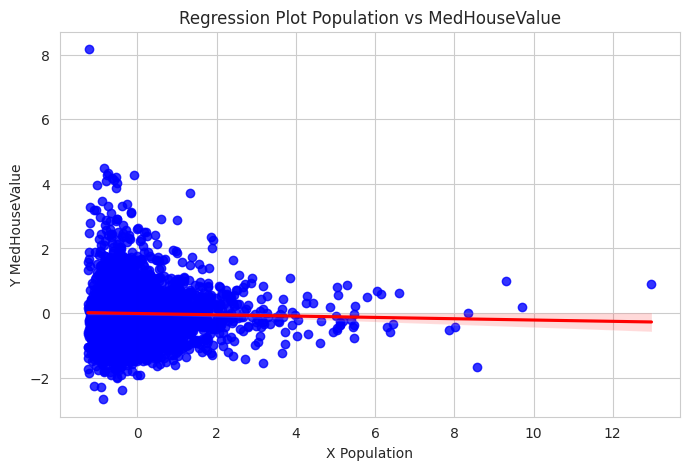

In [48]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [4]], y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X Population")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot Population vs MedHouseValue")

# Show the plot
plt.show()

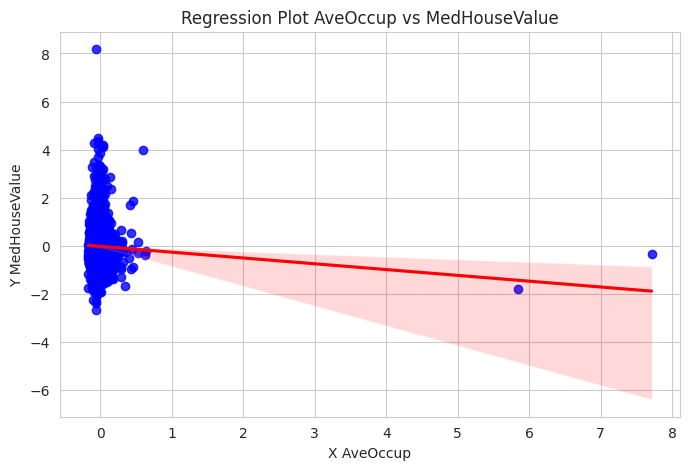

In [49]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [5]], y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X AveOccup")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot AveOccup vs MedHouseValue")

# Show the plot
plt.show()

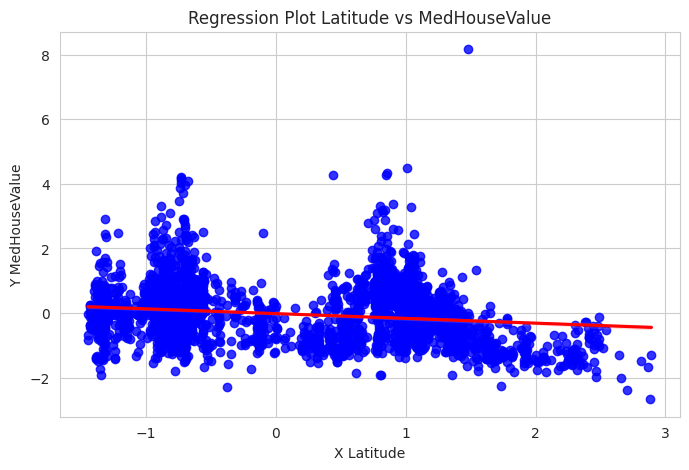

In [50]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [6]], y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X Latitude")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot Latitude vs MedHouseValue")

# Show the plot
plt.show()

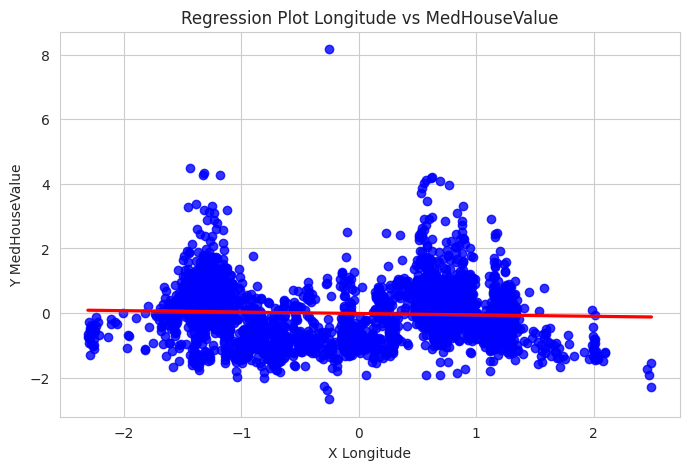

In [51]:
# Create the regression plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.regplot(x=X_test[:, [7]], y=y_pred, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel("X Longitude")
plt.ylabel("Y MedHouseValue")
plt.title("Regression Plot Longitude vs MedHouseValue")

# Show the plot
plt.show()

In [52]:
%whos

Variable            Type                Data/Info
-------------------------------------------------
LinearRegression    type                <class '__main__.LinearRegression'>
StandardScaler      type                <class 'sklearn.preproces<...>ng._data.StandardScaler'>
X                   ndarray             20640x8: 165120 elems, type `float64`, 1320960 bytes (1.259765625 Mb)
X_test              ndarray             4128x8: 33024 elems, type `float64`, 264192 bytes (258.0 kb)
X_train             ndarray             16512x8: 132096 elems, type `float64`, 1056768 bytes (1.0078125 Mb)
ax                  ndarray             2: 2 elems, type `object`, 16 bytes
correlation         function            <function correlation at 0x7f23f79bd9e0>
drive               module              <module 'google.colab.dri<...>s/google/colab/drive.py'>
fig                 Figure              Figure(1000x500)
iterations          int                 3000
learning_rate       float               1e-05
linear_r